Importing Our Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



data = pd.read_csv('NFA_2018_Edition.csv', sep = ',')

data.sample(5)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
62689,United Kingdom,1973,229,AreaTotHA,7.549596e+06,1.148272e+07,1.898007e+06,5.292520e+07,1.873127e+06,0.000000,7.572865e+07,3A
69356,World,1982,5001,EFConsPerCap,5.226729e-01,2.183975e-01,3.622475e-01,9.611998e-02,4.165883e-02,1.388527,2.629622e+00,3A
57952,Syrian Arab Republic,1984,212,AreaPerCap,5.482135e-01,8.066127e-01,3.711255e-02,2.296989e-02,2.910593e-02,0.000000,1.444015e+00,3A
47548,Philippines,1965,171,EFConsPerCap,2.600539e-01,1.537443e-02,3.439172e-01,1.728490e-01,2.438058e-02,0.190638,1.007213e+00,3A
10407,Central African Republic,1994,37,EFProdTotGHA,1.020375e+06,2.459027e+06,1.598407e+06,2.096261e+04,8.336815e+04,81258.511580,5.263398e+06,3A


Below, we are checking the data-type of each column to make sure each column is in the form we want it to be

In [ ]:
data.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land       float64
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore             object
dtype: object

The Data type of the "country", "record", and "QScore" columns needs to be set to String. This has been done below.

In [ ]:
data["country"] = data['country'].astype('string')
data["record"] = data['record'].astype('string')
data["QScore"] = data['QScore'].astype('string')

data.dtypes

country            string
year                int64
country_code        int64
record             string
crop_land         float64
grazing_land      float64
forest_land       float64
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore             string
dtype: object

In order to carry out accurate pre-processing we have to first find out the number of Null Values in each column.

In [ ]:
print(data.isna().sum())
print(data.shape)

country               0
year                  0
country_code          0
record                0
crop_land         18792
grazing_land      18792
forest_land       18792
fishing_ground    18792
built_up_land     18792
carbon            18792
total                 0
QScore                0
dtype: int64
(69616, 12)


Since Entire rows contain NULL values, we have removed all such rows to clean our data. Rows were removed by removing rows that had less than 7 non-NULL cells.

In [ ]:
cleanData = data.dropna(axis=0, thresh=7)
#compression_opts = dict(method='zip', archive_name='out.csv')  

#cleanData.to_csv('out.zip', index=False, compression=compression_opts) 


print(cleanData.shape)
print(cleanData.isna().sum())

(50824, 12)
country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64


The QScore is indicative of the reliability of Data. By dropping duplicate countries, we can get a feel for how reliable our overall data is for each country.

(196, 12)


Text(0.5, 1.02, 'Reliability of Data')

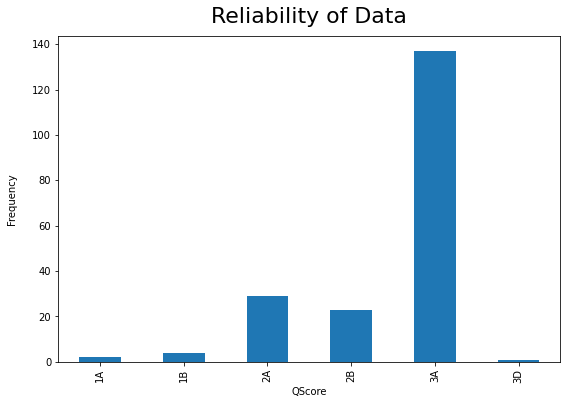

In [ ]:
countryUnique = data.drop_duplicates(subset = "country")
countryUniqueCleaned = cleanData.drop_duplicates(subset = "country")

print(countryUnique.shape)
#print(countryUnique.tail(20))

countryUnique.groupby('QScore').size().plot(kind = 'bar', figsize=(9, 6))
plt.ylabel("Frequency", labelpad=15)
plt.title("Reliability of Data", y=1.02, fontsize=22)

#countryUniqueCleaned.groupby('QScore').size().plot(kind = 'bar')

By filtering our data for only Ecological Footprint Consumption, we can observe how World Carbon Footprint levels have changed from 1969 - 2014.

Text(0.5, 1.02, 'World Carbon Footprint')

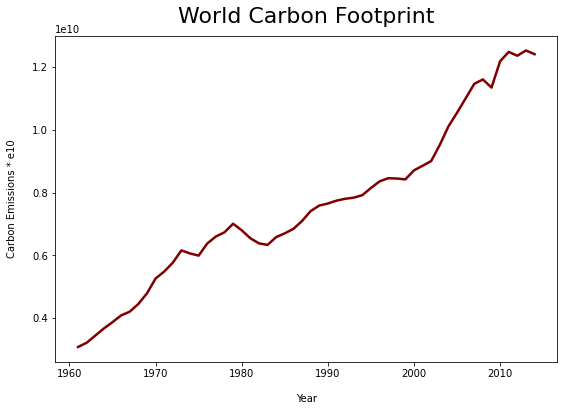

In [ ]:
#data.loc[data.record == "EFConsTotGHA" & data.country == "World"]
#import matplotlib.pyplot as plt

worldData = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]

worldData.sample(5)

worldData.set_index('year')['carbon'].plot(figsize=(9, 6), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Carbon Emissions * e10", labelpad=15)
plt.title("World Carbon Footprint", y=1.02, fontsize=22)

The Ecological Footprint gives an idea of how much Land/Water bodies are available for consumption, while the Bio-Capacity is indicative of resources available. Plotting both gives us an idea of the sustainability of our current usage

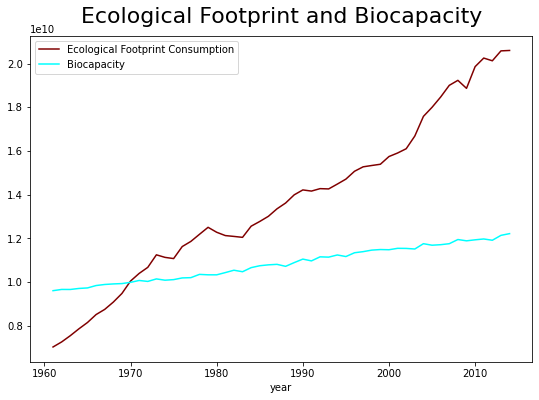

In [ ]:
worldEF = data.loc[(data['record'] == "EFConsTotGHA") & (data['country'] == "World")]
worldBC = data.loc[(data['record'] == "BiocapTotGHA") & (data['country'] == "World")]

#plt.plot('year', 'total', data=worldEF, marker='', color='red', linewidth=2)
#plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
#plt.plot( 'year', 'total', data=worldEF, marker='', color='cyan', linewidth=2)

ax = plt.gca()
worldEF.plot(kind='line',x='year',y='total', color='maroon', figsize=(9, 6), ax=ax)
worldBC.plot(kind='line',x='year',y='total', color='cyan', figsize=(9, 6), ax=ax)
L=plt.legend()
L.get_texts()[0].set_text('Ecological Footprint Consumption')
L.get_texts()[1].set_text('Biocapacity')
plt.title("Ecological Footprint and Biocapacity", y=1.02, fontsize=22)
plt.show()


#worldEF.tail(5)

#worldData.set_index('year')['carbon'].plot(figsize=(9, 6), linewidth=2.5, color='maroon')
#plt.xlabel("Year", labelpad=15)
#plt.ylabel("Carbon Emissions * e10", labelpad=15)
#plt.title("World Carbon Footprint", y=1.02, fontsize=22)

Per Capita values of both give an idea of how much resources are being consumed/ are available per person. The large decrease in BC values are due to a lower increase in actual BC values from 1969.

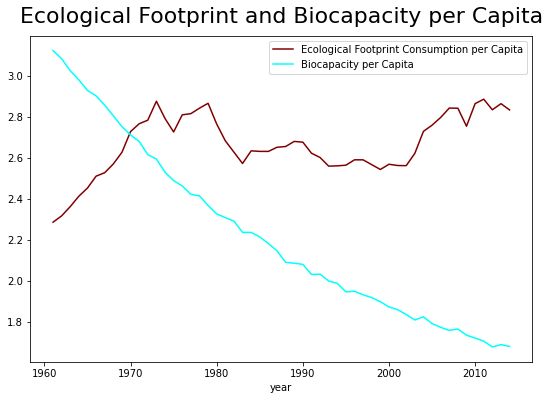

In [ ]:
worldEFCap = data.loc[(data['record'] == "EFConsPerCap") & (data['country'] == "World")]
worldBCCap = data.loc[(data['record'] == "BiocapPerCap") & (data['country'] == "World")]

ax = plt.gca()
worldEFCap.plot(kind='line',x='year',y='total', color='maroon', figsize=(9, 6), ax=ax)
worldBCCap.plot(kind='line',x='year',y='total', color='cyan', figsize=(9, 6), ax=ax)
L=plt.legend()
L.get_texts()[0].set_text('Ecological Footprint Consumption per Capita')
L.get_texts()[1].set_text('Biocapacity per Capita')
plt.title("Ecological Footprint and Biocapacity per Capita", y=1.02, fontsize=22)
plt.show()

Countries producing the most Ecological Footprint often cause a skew in our data. Below, we've found the highest EF countries in 1970 and 2014.

In [ ]:
EFData1970 = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (cleanData['country'] != "World") & (cleanData['year'] == 1970)]
EFData2014 = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (cleanData['country'] != "World") & (cleanData['year'] == 2014)]

highest1970 = EFData1970.sort_values(by = 'carbon', ascending = False)
highest2014 = EFData2014.sort_values(by = 'carbon', ascending = False)

print(highest1970.head(5))
print(highest2014.head(5))
# grouped=EFData1970['total'].max()
# grouped.sort_index(ascending=True)

# EFData1970.head(10)
# print(EFData1970.loc[EFData1970.groupby('Shop')['Sales'].idxmax()].sort_values('Sales', ascending=False))

                        country  year  ...         total QScore
63285  United States of America  1970  ...  2.169331e+09     3A
22181                   Germany  1970  ...  5.372562e+08     3A
30869                     Japan  1970  ...  5.324456e+08     3A
68829                     China  1970  ...  8.887065e+08     3A
62669            United Kingdom  1970  ...  3.936914e+08     3A

[5 rows x 12 columns]
                        country  year  ...         total QScore
69181                     China  2014  ...  5.196178e+09     3A
63637  United States of America  2014  ...  2.672527e+09     3A
27365                     India  2014  ...  1.450832e+09     3A
51981        Russian Federation  2014  ...  7.986442e+08     3A
31221                     Japan  2014  ...  6.015465e+08     3A

[5 rows x 12 columns]


The following scatterplot was drawn up to observe how Ecological Footprint values have changed over time. This gives us an idea about how production values have increased with time.

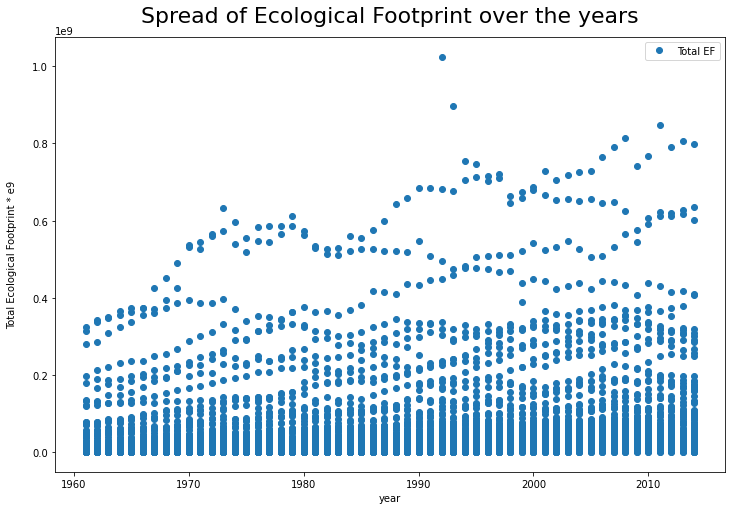

In [ ]:
array = ['China',  "United States of America", "India", "World"] #Write code to find these high countries
#yearData = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (cleanData['country'] != "World") & (cleanData['country'] != "China") & (cleanData['country'] != " United States of America")]
yearData = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (~cleanData['country'].isin(array))]
#print(yearData)
print()

yearData.plot(x = 'year', y = 'total', style = 'o', figsize=(12, 8)) #Total not carbon
plt.ylabel("Total Ecological Footprint * e9", labelpad=15)
plt.title("Spread of Ecological Footprint over the years", y=1.02, fontsize=22)
L=plt.legend()
L.get_texts()[0].set_text('Total EF')

The plot drawn below compares Ecological Footprint consumption and Bio-Capacity values over time. Data from all countries, except for the world category, is used.

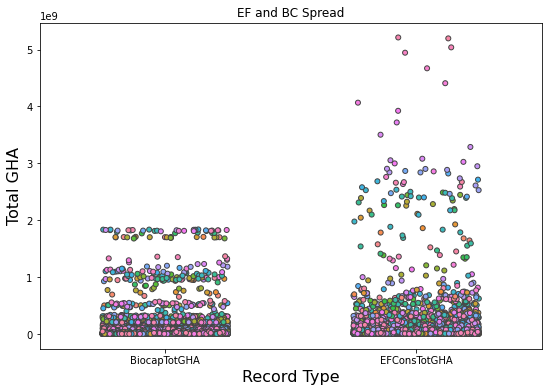

In [ ]:
#import seaborn as sns
array = ['EFConsTotGHA', 'BiocapTotGHA']
recordData = cleanData.loc[(cleanData['record'].isin(array)) & (cleanData['country'] != "World")]

plt.figure(figsize=(9,6))
axis = sns.stripplot(x='record', y='total', data=recordData, jitter = 0.25, linewidth = 1, hue = 'year')
#axis.set_xticklabels(axis.get_xticklabels(), rotation=90)

axis.set_title('EF and BC Spread')
plt.xlabel("Record Type", size=16)
plt.ylabel("Total GHA", size=16)
#axis.legend.remove() #Change later IMPORTANT
axis.legend([],[], frameon=False)

# params = dict(data=recordData,
#               x='record',
#               y='total')#,
#               #hue='year')#,
#               #jitter=True,
#               #linewidth = 1)
# p = sns.stripplot(size=8,
#                   #jitter=0.35,
#                   palette=['#91bfdb','#fc8d59'],
#                   edgecolor='black',
#                   linewidth=1,
#                   **params)
# p_box = sns.boxplot(palette=['#BBBBBB','#DDDDDD'],linewidth=1,**params)
# axis.set_title('EF and BC Spread')
# plt.xlabel("Record Type", size=16)
# plt.ylabel("Total GHA", size=16)
# axis.legend([],[], frameon=False)

#newData.sample(10)

The Bosplot below further supports the analysis that can be drawn from the plot drawn above. Removing the top 3 countries helps give a better idea of how Ecological Footprint and Bio-Capacity is distributed between countries.

Text(0, 0.5, 'Record Type')

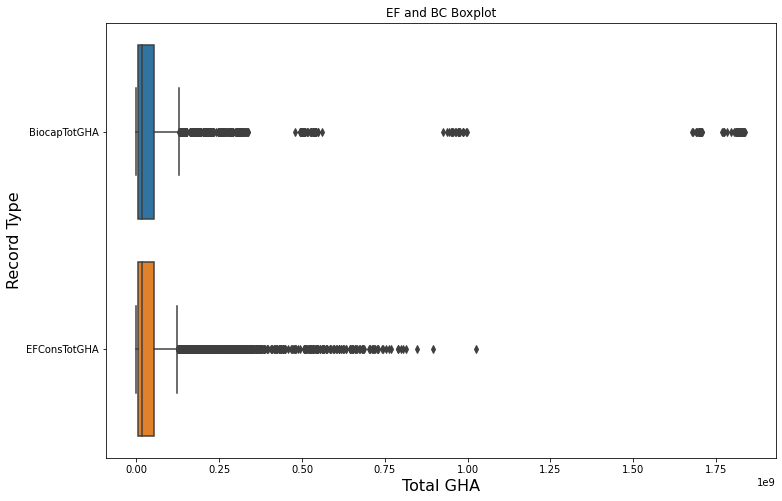

In [ ]:
arrayOutliers = ['China',  "United States of America", "India", "World"]
array = ['EFConsTotGHA','BiocapTotGHA']
#array = ['BiocapTotGHA']

plt.figure(figsize=(12,8))
boxData = cleanData.loc[(cleanData['record'].isin(array)) & (~cleanData['country'].isin(arrayOutliers))]


# sns.boxplot(x="record", y="total", data=boxData)
sns.boxplot(x="total", y="record", data=boxData).set_title('EF and BC Boxplot')
#plt.set_title('EF and BC Spread')
plt.xlabel("Total GHA", size=16)
plt.ylabel("Record Type", size=16)

In order to see how countries producing the most Carbon Footprints have changed, we've plotted a pie chart to show the top 5 countries in 1970 and 2014, along with how the rest of the world compares with them.

Text(0.5, 1.02, 'Carbon Footprint between countries for 2014')

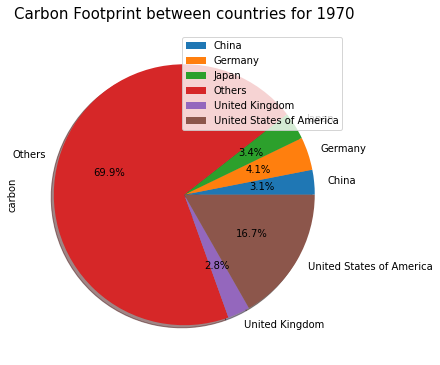

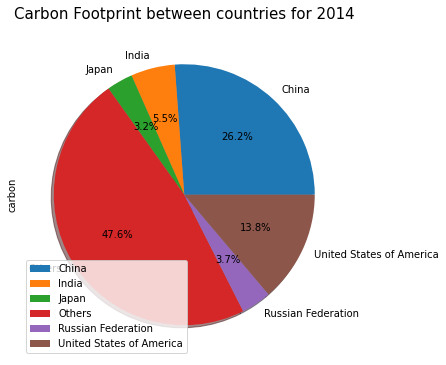

In [ ]:
# EFData1970.groupby('country').plot(kind='pie', y='carbon')

# EFData1970.sample(5)
arraytop5 = ['Germany', 'China', 'Japan', 'United States of America', 'United Kingdom']
top6 = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (cleanData['country'].isin(arraytop5)) & (cleanData['year'] == 1970)]
othersRaw = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (~cleanData['country'].isin(arraytop5)) & (cleanData['year'] == 1970)]

totOtherCarbon1970 = othersRaw['carbon'].sum()
# # others1970 = pd.DataFrame({'country' = })

others1970 = pd.DataFrame({"country":['Others'], 
                    "carbon":[totOtherCarbon1970]})

top6 = top6.append(others1970, ignore_index = True)

arraytop52014 = ['United States of America', 'China', 'India', "Japan", 'Russian Federation']
top62014 = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (cleanData['country'].isin(arraytop52014)) & (cleanData['year'] == 2014)]
othersRaw2014 = cleanData.loc[(cleanData['record'] == "EFConsTotGHA") & (~cleanData['country'].isin(arraytop52014)) & (cleanData['year'] == 2014)]
totOtherCarbon2014 = othersRaw2014['carbon'].sum()
others2014 = pd.DataFrame({"country":['Others'], 
                    "carbon":[totOtherCarbon1970]})
top62014 = top62014.append(others1970, ignore_index = True)


top6.groupby(['country']).sum().plot(kind='pie', y='carbon', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Carbon Footprint between countries for 1970", y=1.02, fontsize=15)

top62014.groupby(['country']).sum().plot(kind='pie', y='carbon', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("Carbon Footprint between countries for 2014", y=1.02, fontsize=15)

Finding countries with highest/lowest Bio-Capacity values in 1970 and 2014.

In [ ]:
BCData1970 = cleanData.loc[(cleanData['record'] == "BiocapTotGHA") & (cleanData['country'] != "World") & (cleanData['year'] == 1970)]
BCData2014 = cleanData.loc[(cleanData['record'] == "BiocapTotGHA") & (cleanData['country'] != "World") & (cleanData['year'] == 2014)]

highest1970 = BCData1970.sort_values(by = 'total', ascending = False)
highest2014 = BCData2014.sort_values(by = 'total', ascending = False)

print(highest1970.head(5))
print(highest2014.head(5))

                        country  year  ...         total QScore
6523                     Brazil  1970  ...  1.699226e+09     3A
63283  United States of America  1970  ...  9.595732e+08     3A
68827                     China  1970  ...  7.601713e+08     3A
9195                     Canada  1970  ...  4.952460e+08     3A
2699                  Australia  1970  ...  3.111935e+08     3A

[5 rows x 12 columns]
                        country  year  ...         total QScore
6875                     Brazil  2014  ...  1.824278e+09     3A
69179                     China  2014  ...  1.365995e+09     3A
63635  United States of America  2014  ...  1.144830e+09     3A
51979        Russian Federation  2014  ...  9.863281e+08     3A
27363                     India  2014  ...  5.856959e+08     3A

[5 rows x 12 columns]


A similar method, as used for Carbon Footprint, was used to plot the pie charts for Bio-Capacity distribution in 1970 and 2014.

Text(0.5, 1.02, 'BioCapacity between countries for 2014')

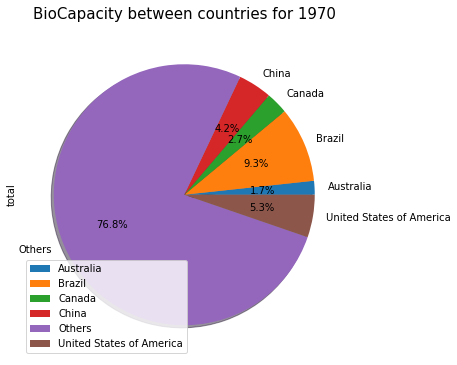

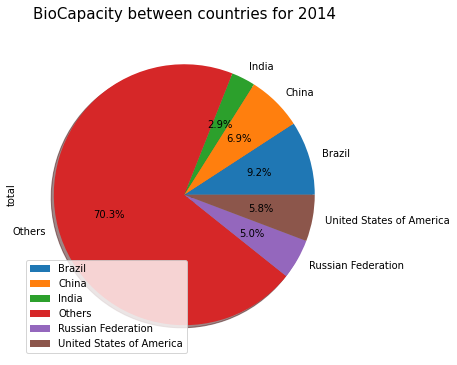

In [ ]:
arraytop5 = ['Brazil', 'China', 'Canada', 'Australia', 'United States of America']
top6 = cleanData.loc[(cleanData['record'] == "BiocapTotGHA") & (cleanData['country'].isin(arraytop5)) & (cleanData['year'] == 1970)]
othersRaw = cleanData.loc[(cleanData['record'] == "BiocapTotGHA") & (~cleanData['country'].isin(arraytop5)) & (cleanData['year'] == 1970)]

totOtherCarbon1970 = othersRaw['total'].sum()
# # others1970 = pd.DataFrame({'country' = })

others1970 = pd.DataFrame({"country":['Others'], 
                    "total":[totOtherCarbon1970]})

top6 = top6.append(others1970, ignore_index = True)

arraytop52014 = ['Brazil', 'China', 'United States of America', "India", 'Russian Federation']
top62014 = cleanData.loc[(cleanData['record'] == "BiocapTotGHA") & (cleanData['country'].isin(arraytop52014)) & (cleanData['year'] == 2014)]
othersRaw2014 = cleanData.loc[(cleanData['record'] == "BiocapTotGHA") & (~cleanData['country'].isin(arraytop52014)) & (cleanData['year'] == 2014)]
totOtherCarbon2014 = othersRaw2014['total'].sum()
others2014 = pd.DataFrame({"country":['Others'], 
                    "carbon":[totOtherCarbon1970]})
top62014 = top62014.append(others1970, ignore_index = True)


top6.groupby(['country']).sum().plot(kind='pie', y='total', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("BioCapacity between countries for 1970", y=1.02, fontsize=15)

top62014.groupby(['country']).sum().plot(kind='pie', y='total', legend=True, autopct='%1.1f%%', figsize=(9,6), shadow=True)
plt.title("BioCapacity between countries for 2014", y=1.02, fontsize=15)

In order to gauge the co-relation between our variables, we used a correlation matrix represented through a heatmap. Different heatmaps for each type of record were drawn.

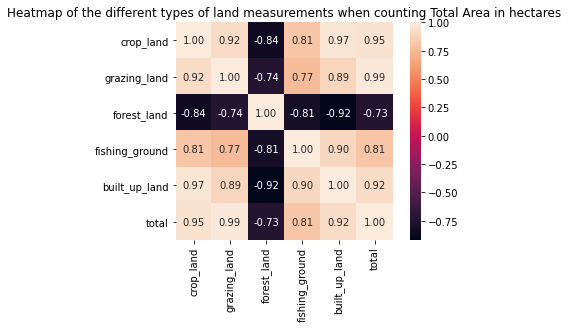

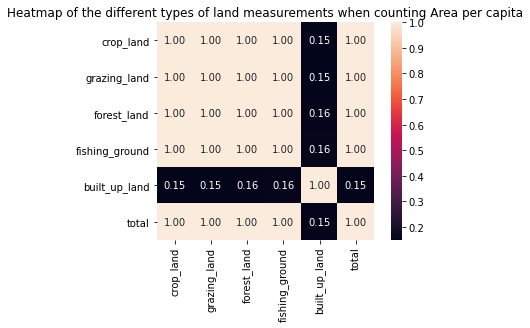

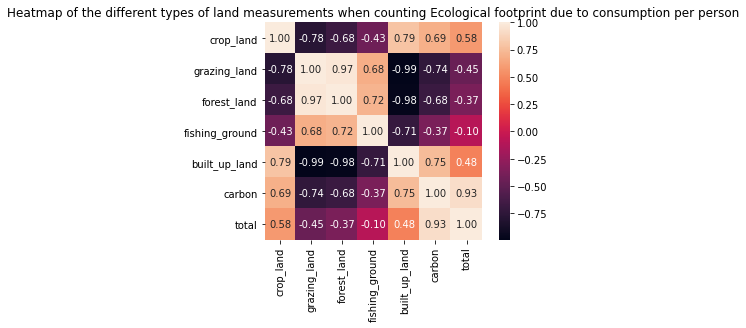

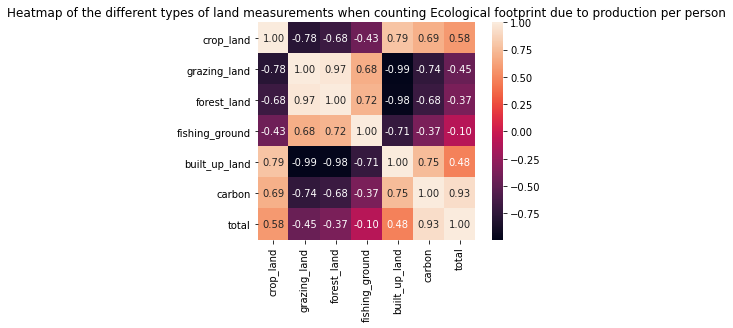

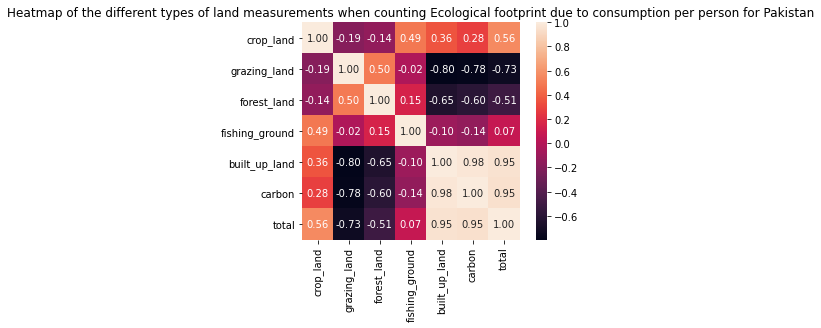

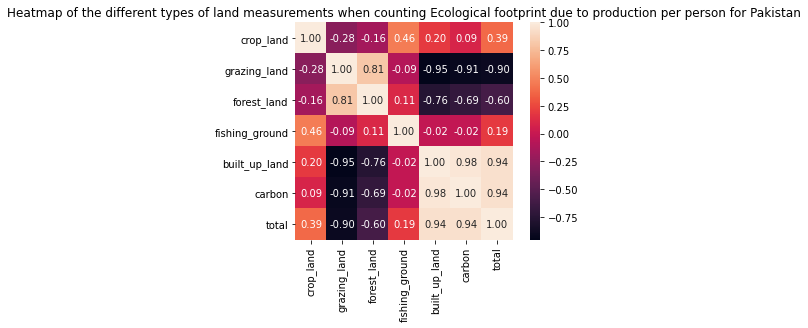

In [ ]:
worldDataArea = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "AreaTotHA") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','total']]
worldDataBiocap = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "AreaPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','total']]
worldDataEFConsPerCap = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "EFConsPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]
worldDataEFProdPerCap = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "EFProdPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]



corrmat = worldDataArea.corr()
corrmat2 = worldDataBiocap.corr()
corrmat3 = worldDataEFConsPerCap.corr()
corrmat4 = worldDataEFProdPerCap.corr()


sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Total Area in hectares")
plt.show()
plt.title("Heatmap of the different types of land measurements when counting Area per capita")
sns.heatmap(corrmat2,square=True,annot=True, fmt='.2f')
plt.show()
sns.heatmap(corrmat3,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to consumption per person")
plt.show()
sns.heatmap(corrmat4,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to production per person")
plt.show()

PakistanEFConsPerCap = cleanData.loc[(cleanData['country'] == "Pakistan") & (cleanData['record'] == "EFConsPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]
PakistanEFProdPerCap = cleanData.loc[(cleanData['country'] == "Pakistan") & (cleanData['record'] == "EFProdPerCap") ,['crop_land','grazing_land','forest_land','fishing_ground','built_up_land','carbon','total']]

corrmat5 = PakistanEFConsPerCap.corr()
corrmat6 = PakistanEFProdPerCap.corr()

sns.heatmap(corrmat5,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to consumption per person for Pakistan")
plt.show()

sns.heatmap(corrmat6,square=True,annot=True, fmt='.2f')
plt.title("Heatmap of the different types of land measurements when counting Ecological footprint due to production per person for Pakistan")
plt.show()

Ecological Footprint values in our dataset contain a breakdown of how resources are divided between different types of Land and Water resources. The following line graphs shows how these individual resources have changed with time.

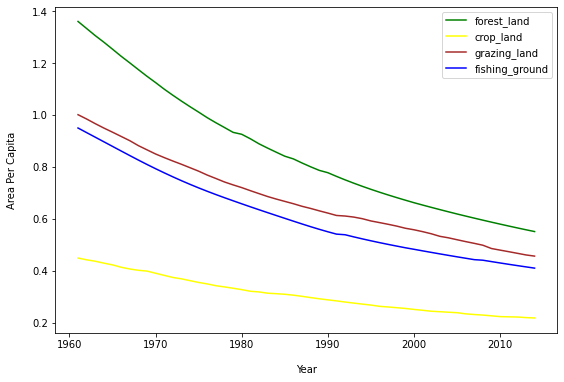

In [ ]:
ax = plt.gca()
worldDataAreaPerCapita = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='forest_land', color='green', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='crop_land', color='yellow', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='grazing_land', color='brown', figsize=(9, 6), ax=ax)
worldDataAreaPerCapita.plot(kind='line',x='year',y='fishing_ground', color='blue', figsize=(9, 6), ax=ax)

plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita", labelpad=15)
plt.show()




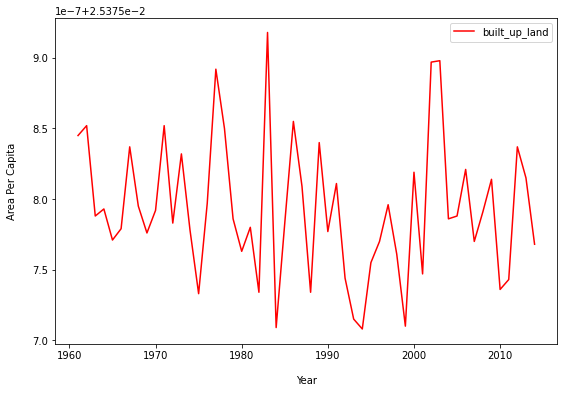

In [ ]:
ax = plt.gca()

worldDataAreaPerCapita = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "AreaPerCap") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaPerCapita.plot(kind='line',x='year',y='built_up_land', color='red', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Area Per Capita", labelpad=15)
plt.show()

Expressing the values per capita gives the following graph.

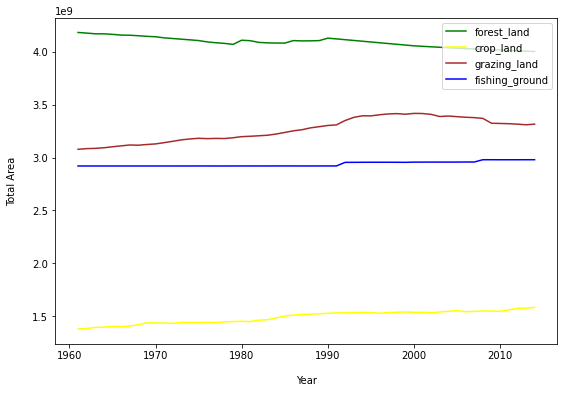

In [ ]:
ax = plt.gca()
worldDataAreaLand = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='forest_land', color='green', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='crop_land', color='yellow', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='grazing_land', color='brown', figsize=(9, 6), ax=ax)
worldDataAreaLand.plot(kind='line',x='year',y='fishing_ground', color='blue', figsize=(9, 6), ax=ax)

plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area", labelpad=15)
plt.show()


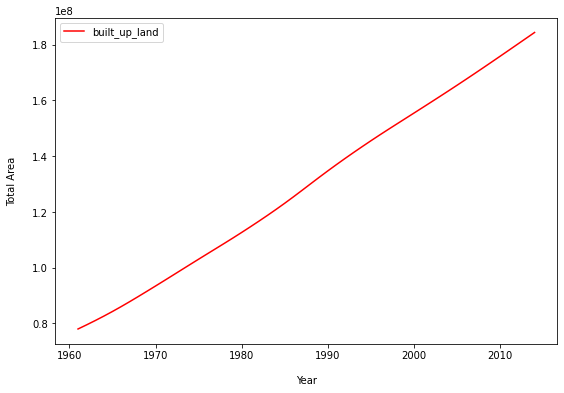

In [ ]:
ax = plt.gca()

worldDataAreaLand = cleanData.loc[(cleanData['country'] == "World") & (cleanData['record'] == "AreaTotHA") ,['year','crop_land','grazing_land','forest_land','fishing_ground','built_up_land']]
worldDataAreaLand.plot(kind='line',x='year',y='built_up_land', color='red', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Area", labelpad=15)
plt.show()

# **Model**


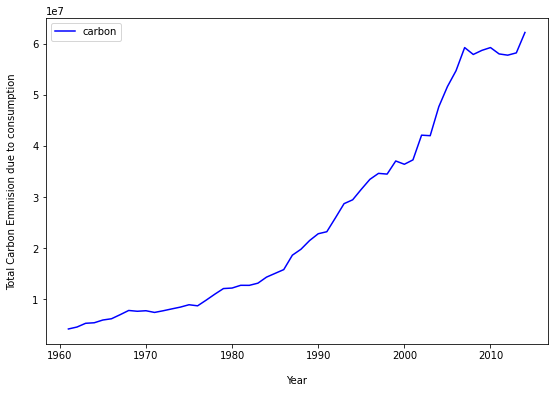

,year,carbon
45181,1961-01-01,4.173464e+06
45189,1962-01-01,4.555250e+06
45197,1963-01-01,5.285153e+06
45205,1964-01-01,5.388680e+06
45213,1965-01-01,5.926581e+06
45221,1966-01-01,6.173222e+06
45229,1967-01-01,6.964560e+06
45237,1968-01-01,7.795203e+06
45245,1969-01-01,7.639989e+06
45253,1970-01-01,7.742842e+06


In [ ]:
ax = plt.gca()

worldDataEFCons = cleanData.loc[(cleanData['country'] == "Pakistan") & (cleanData['record'] == "EFConsTotGHA") ,['year','carbon']]
worldDataEFCons.plot(kind='line',x='year',y='carbon', color='blue', figsize=(9, 6), ax=ax)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Total Carbon Emmision due to consumption", labelpad=15)
worldDataEFCons['year'] = pd.to_datetime(worldDataEFCons['year'], format='%Y')
plt.show()
worldDataEFCons

Auto-correlation graphs are used to determine the p values to be used in the arima model.

,carbon
year,
1961-01-01,4.173464e+06
1962-01-01,4.555250e+06
1963-01-01,5.285153e+06
1964-01-01,5.388680e+06
1965-01-01,5.926581e+06
1966-01-01,6.173222e+06
1967-01-01,6.964560e+06
1968-01-01,7.795203e+06
1969-01-01,7.639989e+06


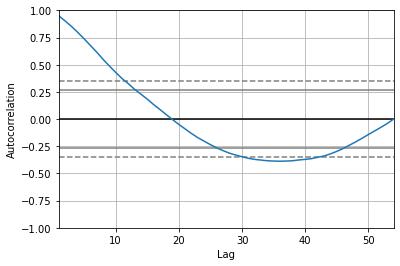

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(worldDataEFCons.set_index('year'))
worldDataEFCons.set_index('year')

Residuals and distribution of the errors are shown below. Mean values closer to zero are ideal.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -816.106
Method:                       css-mle   S.D. of innovations        1154775.300
Date:                Thu, 03 Dec 2020   AIC                           1652.211
Time:                        11:01:17   BIC                           1671.914
Sample:                    01-01-1962   HQIC                          1659.788
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.095e+06   3.05e+05      3.588      0.001    4.97e+05    1.69e+06
ar.L1.D.carbon     0.2005      0.144      1.395      0.170      -0.081       0.482
ar.L2.D.carbon     0.2757      0.147

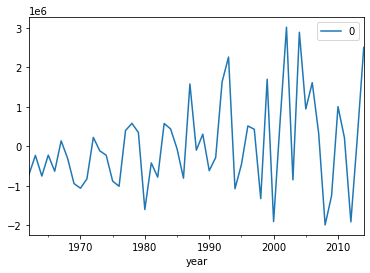

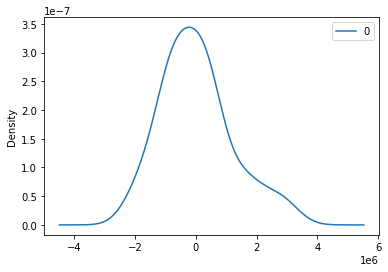

                  0
count  5.300000e+01
mean   2.422664e+04
std    1.169608e+06
min   -1.988471e+06
25%   -8.037421e+05
50%   -1.105203e+05
75%    5.190074e+05
max    3.019748e+06


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(worldDataEFCons.set_index('year'), order=(8,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Training on the dataset for Pakistan. A grpah of actual values along with predicted values is plotted.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

Test MSE: 5797294420973.212


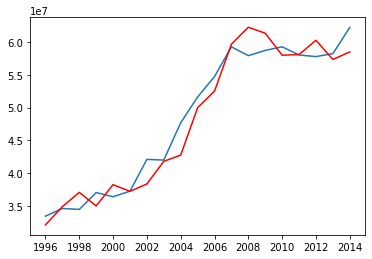

In [ ]:
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = worldDataEFCons.set_index('year')
X.squeeze()
X = X['carbon']
size = int(len(X) * 0.66)

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(8,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pred = test.copy()

dates = [i for i in range(1996,2015)]

actpredicts = [i[0] for i in predictions]

for i in range(len(pred)):
  pred[i] = actpredicts[i]

# plot
plt.plot(test)
plt.plot(pred, color='red')
plt.show()


The process is repeated for Pakistan and top 5 countries in the world.

In [ ]:
def getCarbon(country):
  CarbonCountry = cleanData.loc[(cleanData['country'] == country) & (cleanData['record'] == "EFConsTotGHA") ,['year','carbon']]
  CarbonCountry['year'] = pd.to_datetime(CarbonCountry['year'], format='%Y')
  return CarbonCountry

def getAutocorrelation(frame):
  autocorrelation_plot(frame.set_index('year'))
  plt.show()

def ARIMATry(frame, p):
  model = ARIMA(frame.set_index('year'), order=(p,1,0))
  model_fit = model.fit(disp=0)
  print(model_fit.summary())
  # plot residual errors
  residuals = DataFrame(model_fit.resid)
  residuals.plot()
  plt.show()
  residuals.plot(kind='kde')
  plt.show()
  print(residuals.describe())

def getARIMAmodel(frame,p):
  X = frame.set_index('year')
  #print(X)
  X.squeeze()
  X = X['carbon']
  size = int(len(X) * 0.66)

  train, test = X[0:size], X[size:len(X)]
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=(p,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    
  error = mean_squared_error(test, predictions)
  print('Test MSE: %.3f' % error)
  pred = test.copy()

  dates = [i for i in range(1996,2015)]

  actpredicts = [i[0] for i in predictions]

  for i in range(len(pred)):
    pred[i] = actpredicts[i]

  # plot
  plt.plot(test)
  plt.plot(pred, color='red')
  plt.show()

  forecast = model_fit.forecast(5)
  forecast = forecast[0]

  return forecast





Country:  Pakistan


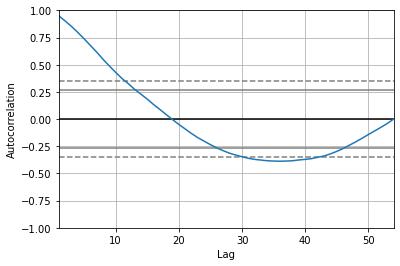

Country:  United States of America


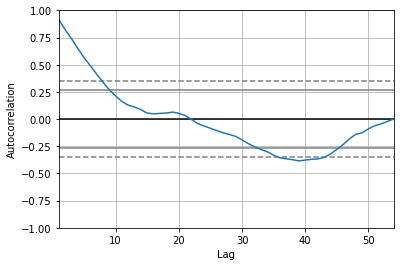

Country:  China


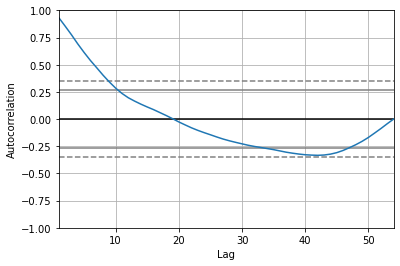

Country:  India


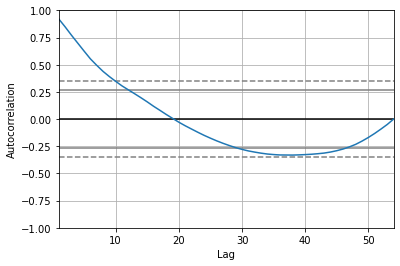

Country:  Japan


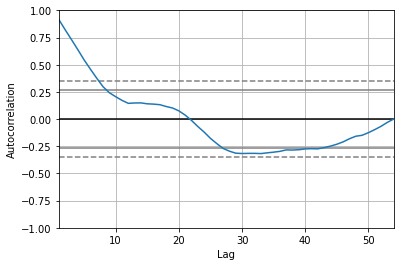

Country:  World


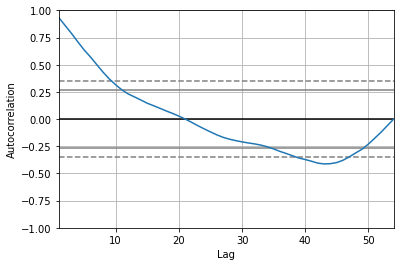

In [ ]:
countries = ['Pakistan', 'United States of America', 'China', 'India', "Japan",'World']
for i in countries:
  print("Country: ",i)
  frame = getCarbon(i)
  getAutocorrelation(frame)



COUNTRY:  Pakistan


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -816.106
Method:                       css-mle   S.D. of innovations        1154775.300
Date:                Thu, 03 Dec 2020   AIC                           1652.211
Time:                        11:01:42   BIC                           1671.914
Sample:                    01-01-1962   HQIC                          1659.788
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.095e+06   3.05e+05      3.588      0.001    4.97e+05    1.69e+06
ar.L1.D.carbon     0.2005      0.144      1.395      0.170      -0.081       0.482
ar.L2.D.carbon     0.2757      0.147

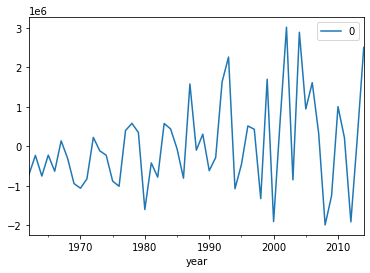

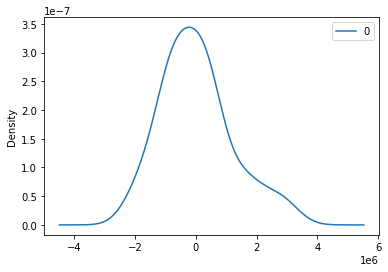

                  0
count  5.300000e+01
mean   2.422664e+04
std    1.169608e+06
min   -1.988471e+06
25%   -8.037421e+05
50%   -1.105203e+05
75%    5.190074e+05
max    3.019748e+06
COUNTRY:  United States of America


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1027.617
Method:                       css-mle   S.D. of innovations       63488341.468
Date:                Thu, 03 Dec 2020   AIC                           2073.234
Time:                        11:01:43   BIC                           2090.967
Sample:                    01-01-1962   HQIC                          2080.053
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1.76e+07   1.57e+07      1.122      0.268   -1.32e+07    4.84e+07
ar.L1.D.carbon     0.2427      0.135      1.799      0.079      -0.022       0.507
ar.L2.D.carbon    -0.1240      0.138

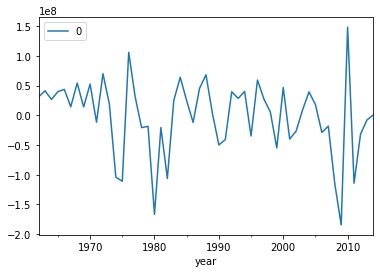

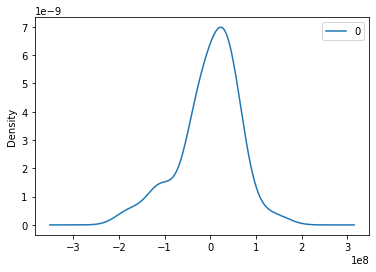

                  0
count  5.300000e+01
mean  -1.577448e+06
std    6.414711e+07
min   -1.846323e+08
25%   -2.887608e+07
50%    1.404882e+07
75%    3.980783e+07
max    1.482960e+08
COUNTRY:  China


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(7, 1, 0)   Log Likelihood               -1017.092
Method:                       css-mle   S.D. of innovations       51216576.237
Date:                Thu, 03 Dec 2020   AIC                           2052.183
Time:                        11:01:45   BIC                           2069.916
Sample:                    01-01-1962   HQIC                          2059.002
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.464e+07   3.18e+07      2.033      0.048    2.34e+06    1.27e+08
ar.L1.D.carbon     0.5331      0.135      3.956      0.000       0.269       0.797
ar.L2.D.carbon     0.4513      0.150

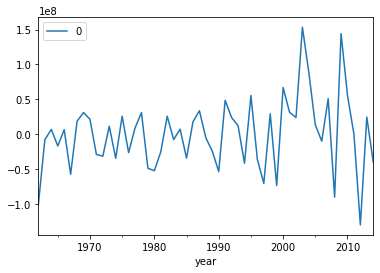

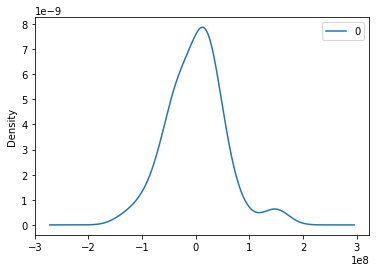

                  0
count  5.300000e+01
mean   2.229771e+05
std    5.288122e+07
min   -1.302796e+08
25%   -3.447485e+07
50%    6.692652e+06
75%    2.569153e+07
max    1.532372e+08
COUNTRY:  India


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/

                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -923.699
Method:                       css-mle   S.D. of innovations       90674501.749
Date:                Thu, 03 Dec 2020   AIC                           1867.399
Time:                        11:01:48   BIC                           1887.102
Sample:                    01-01-1962   HQIC                          1874.976
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.341e+07        nan        nan        nan         nan         nan
ar.L1.D.carbon     0.4792   2.92e-07   1.64e+06      0.000       0.479       0.479
ar.L2.D.carbon     0.5124   5.76e-06

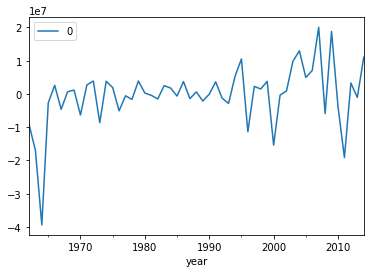

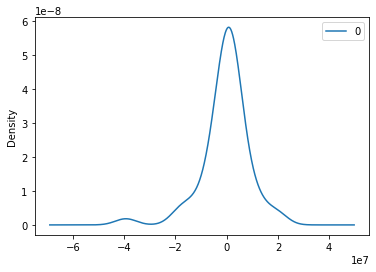

                  0
count  5.300000e+01
mean  -3.194320e+05
std    9.170358e+06
min   -3.936709e+07
25%   -2.660838e+06
50%    6.055898e+05
75%    3.721862e+06
max    2.004535e+07
COUNTRY:  Japan


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -961.060
Method:                       css-mle   S.D. of innovations       18099708.983
Date:                Thu, 03 Dec 2020   AIC                           1936.120
Time:                        11:01:49   BIC                           1949.912
Sample:                    01-01-1962   HQIC                          1941.423
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.326e+06   4.32e+06      1.464      0.150   -2.14e+06    1.48e+07
ar.L1.D.carbon     0.2650      0.137      1.934      0.059      -0.004       0.534
ar.L2.D.carbon    -0.1164      0.141

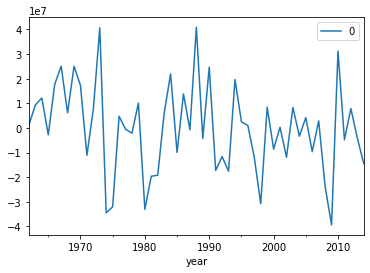

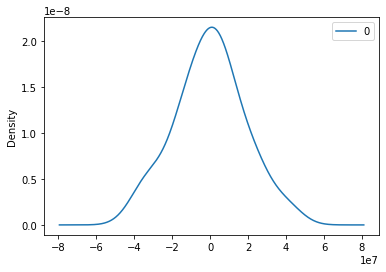

                  0
count  5.300000e+01
mean  -1.602308e+05
std    1.828288e+07
min   -3.937248e+07
25%   -1.163365e+07
50%    2.784447e+05
75%    9.351962e+06
max    4.088414e+07
COUNTRY:  World


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.carbon   No. Observations:                   53
Model:                 ARIMA(8, 1, 0)   Log Likelihood               -1084.832
Method:                       css-mle   S.D. of innovations      185455890.397
Date:                Thu, 03 Dec 2020   AIC                           2189.664
Time:                        11:01:51   BIC                           2209.367
Sample:                    01-01-1962   HQIC                          2197.241
                         - 01-01-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.756e+08   3.61e+07      4.864      0.000    1.05e+08    2.46e+08
ar.L1.D.carbon     0.4148      0.136      3.057      0.004       0.149       0.681
ar.L2.D.carbon    -0.1871      0.146

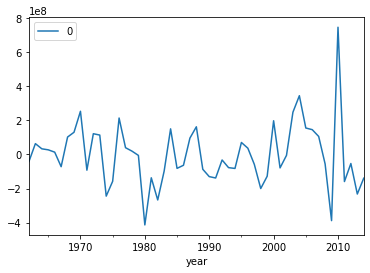

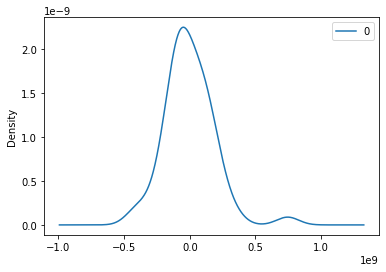

                  0
count  5.300000e+01
mean  -2.820912e+06
std    1.874037e+08
min   -4.134674e+08
25%   -9.775786e+07
50%   -3.276334e+07
75%    1.051703e+08
max    7.452897e+08


In [ ]:
Pvals = [8,7,7,8,5,8]
for i in range(len(Pvals)):
  print('COUNTRY: ',countries[i])
  frame = getCarbon(countries[i])
  ARIMATry(frame,Pvals[i])



COUNTRY:  Pakistan


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

Test MSE: 5797294420973.212


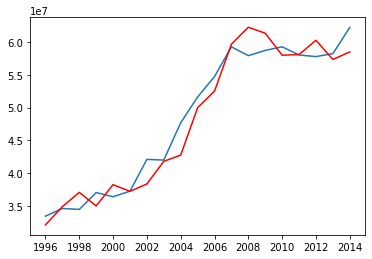

COUNTRY:  United States of America
Test MSE: 7276197595155971.000


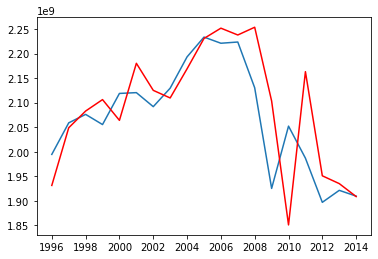

COUNTRY:  China
Test MSE: 10074353800781176.000


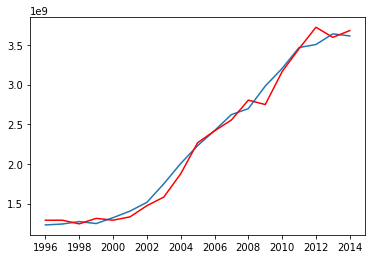

COUNTRY:  India


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/pyt

Test MSE: 273209806743620.094


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


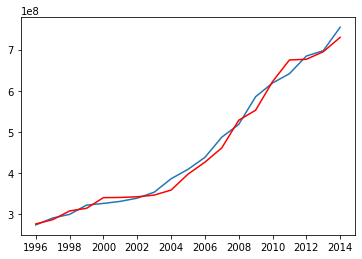

COUNTRY:  Japan
Test MSE: 317717437912347.062


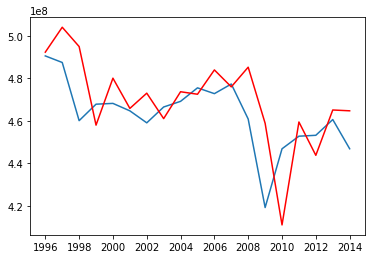

COUNTRY:  World
Test MSE: 93097287582145408.000


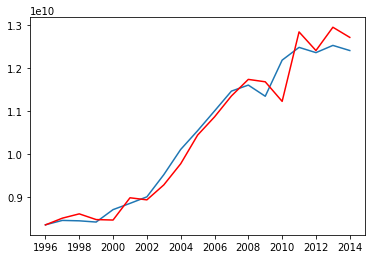

In [ ]:
predictions = []
for i in range(len(countries)):
  print('COUNTRY: ',countries[i])
  frame = getCarbon(countries[i])
  pred = getARIMAmodel(frame,Pvals[i])
  predictions.append(pred)

Fututre values of carbon footprint and their trend is shown below.

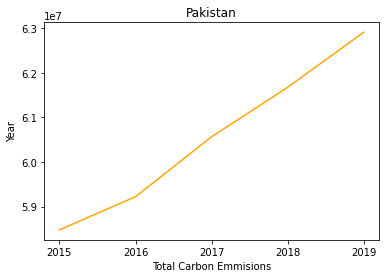

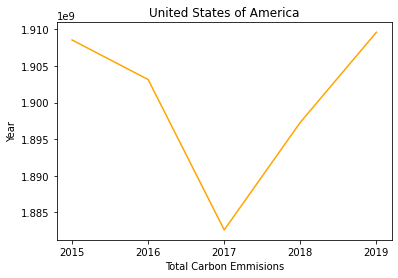

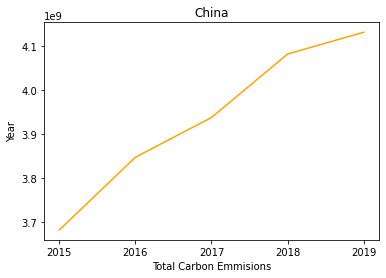

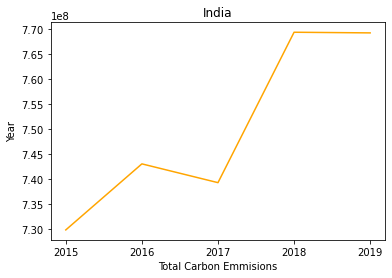

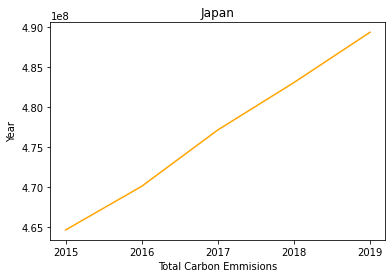

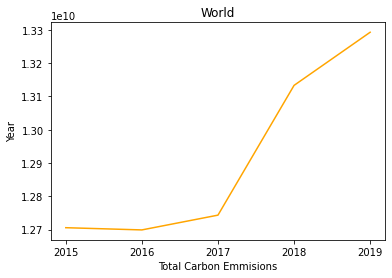

In [ ]:
years = ["2015","2016","2017","2018","2019"]
for i in range(len(countries)):
  plt.plot(years,predictions[i],color = 'orange')
  plt.xlabel("Total Carbon Emmisions")
  plt.ylabel("Year")
  plt.title(countries[i])
  plt.show()